VIDEO GAMES REVIEWS - Group 09¶
      *******************************************************************
      *                                                                 *
      * Group members: Cindy Huang, Lan Bowen, and Manoj Kamalumpundi   *
      *                                                                 *
      *******************************************************************

1. Review Data

In [1]:
import pandas as pd
import nltk
import re
#Import steam_reviews.csv to df
df = pd.read_csv("steam_reviews2.csv",encoding="utf8",sep='|', delimiter=None) 
#Needed to replace delimiter because import confused by comma in text
df = df.sample(n = 2000, replace = True, random_state = 2021)
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
91252,7/1/2016,0,0,601,False,Recommended,Product received for free. I love this game it...,Rocket League®
224597,4/8/2017,0,0,145,True,Recommended,Do you like DayZ with actually guns laying aro...,PLAYERUNKNOWN'S BATTLEGROUNDS
399417,8/25/2018,0,0,1270,False,Recommended,Pretty good one try hards only,Rust
133741,3/22/2016,0,0,609,False,Recommended,After 200 hours of playing i realize somehingI...,Grand Theft Auto V
151390,12/8/2016,0,0,5,False,Not Recommended,i paid $60 for this game and it doesnt even wo...,Grand Theft Auto V


In [2]:
#Review the data info
df.shape

(2000, 8)

2. Clean up review column only

In [3]:
#Repace all non english letters and # with emptry string to remove "NaN" or "None"
df['review1'] = df.review.str.replace(r'[^a-zA-Z ]\s?',r'',regex=True)
df['review1'] = df['review1'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1') #remove repeating words
df['review1']


91252     Product received for freeI love this game its ...
224597    Do you like DayZ with actually guns laying aro...
399417                       Pretty good one try hards only
133741    After hours of playing i realize somehingI was...
151390    i paid for this game and it doesnt even work g...
                                ...                        
356510                                 gret gaem wit frends
433412    Best B Day present everty Taffer lt I rule mos...
39104     very good game great with friends another inst...
87052                                    Best game in YEARS
245265                                                   No
Name: review1, Length: 2000, dtype: object

In [4]:
#Delete rows without any review text
import pandasql as ps
df = ps.sqldf("select * from df WHERE review1 is not null or review1 <> ''")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date_posted             1995 non-null   object
 1   funny                   1995 non-null   int64 
 2   helpful                 1995 non-null   int64 
 3   hour_played             1995 non-null   int64 
 4   is_early_access_review  1995 non-null   int64 
 5   recommendation          1995 non-null   object
 6   review                  1995 non-null   object
 7   title                   1995 non-null   object
 8   review1                 1995 non-null   object
dtypes: int64(4), object(5)
memory usage: 140.4+ KB


In [5]:
#After removed NaN. I was able to clean the data
from collections import Counter              
import nltk 
import itertools
words_all =   [nltk.word_tokenize(s) for s in df["review1"]]
words_all = list(itertools.chain.from_iterable(words_all))
words_all = [s.lower() for s in words_all]
global_stopwords = nltk.corpus.stopwords.words("english")
global_stopwords=global_stopwords+["..."]  
words_all = [s for s in words_all if s not in global_stopwords]
words_all = [s for s in words_all if len(s)>2]
stemmer = nltk.stem.SnowballStemmer("english")
words_all = [stemmer.stem(s) for s in words_all]
len(words_all)

38716

In [6]:
#Find the most frequency words in the review to see 
counts = Counter(words_all)

# Check your answer:
counts.most_common(20)

[('game', 2126),
 ('play', 634),
 ('get', 449),
 ('good', 339),
 ('like', 336),
 ('fun', 321),
 ('great', 237),
 ('time', 236),
 ('dont', 212),
 ('make', 211),
 ('one', 206),
 ('realli', 203),
 ('buy', 201),
 ('still', 194),
 ('player', 193),
 ('friend', 191),
 ('best', 186),
 ('peopl', 181),
 ('even', 171),
 ('would', 153)]

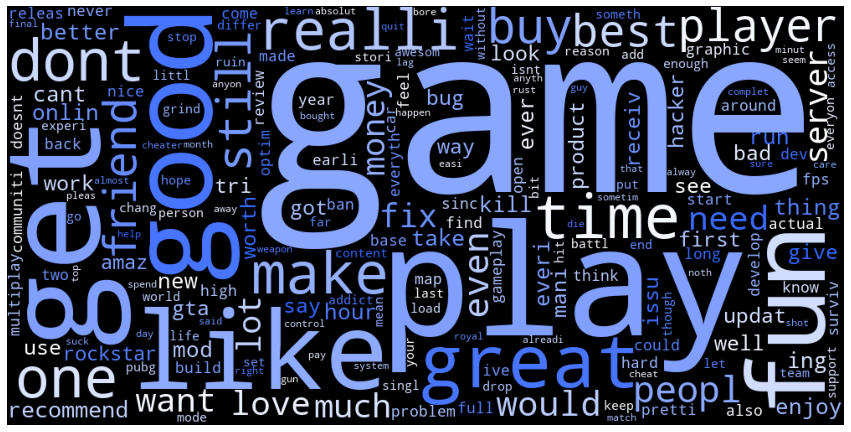

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(225,100%%, %d%%)" % random.randint(60, 100)

wc = WordCloud(width = 1000, height = 500,min_font_size=5, max_words=200, background_color="black").generate_from_frequencies(counts)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

3. Check DTM Matrix before Text Visualization

In [8]:
#DMT of review1 column
from sklearn.feature_extraction.text import CountVectorizer
import nltk 

stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords)
DTM1 = vectorizer.fit_transform(df["review1"])

DTM1.shape

(1995, 8486)

In [9]:
#total frequency of each term across the corpus
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords)
DTM1 = vectorizer.fit_transform(df["review1"])
dfTF = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM1.sum(axis=0).tolist()[0]
                  })

dfTF.sort_values(by="Frequency",inplace=True,ascending=False)
dfTF.reset_index(inplace=True,drop=True)

dfTF.head(20)

,Term,Frequency
0,game,2126
1,play,634
2,get,449
3,good,339
4,like,336
5,fun,321
6,great,237
7,time,236
8,dont,212
9,make,211


4. Text Visualization

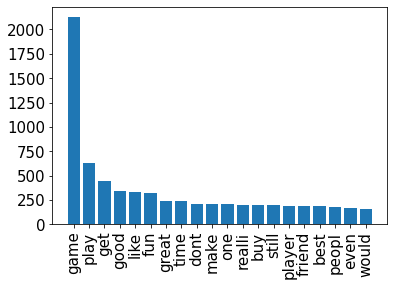

In [10]:
import matplotlib.pyplot as plt  
top = 20                                              #how many top terms to show
fig, ax = plt.subplots()
ax.bar(dfTF.Term[0:top],dfTF.Frequency[0:top])        #define x and y axis.
plt.rcParams['figure.figsize'] = (10,2)               #Figure size displayed in notebook
plt.xticks(rotation=90,fontsize= 15)                  #Rotate and size x labels. 
plt.yticks(fontsize= 15)                              #size y labels.  
plt.show()

In [11]:
import pandas as pd
from afinn import Afinn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
afinn = Afinn(emoticons=True)        #Initialize an analyzer

df["AFINN"]=[afinn.score(s) for s in df["review1"]]
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df["review1"]]
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df["review1"]]

df.head(5)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review1,AFINN,TextBlob,VADER
0,7/1/2016,0,0,601,0,Recommended,Product received for free. I love this game it...,Rocket League®,Product received for freeI love this game its ...,12.0,0.208333,0.9330
1,4/8/2017,0,0,145,1,Recommended,Do you like DayZ with actually guns laying aro...,PLAYERUNKNOWN'S BATTLEGROUNDS,Do you like DayZ with actually guns laying aro...,-3.0,0.084954,-0.1269
2,8/25/2018,0,0,1270,0,Recommended,Pretty good one try hards only,Rust,Pretty good one try hards only,4.0,0.316667,0.7269
3,3/22/2016,0,0,609,0,Recommended,After 200 hours of playing i realize somehingI...,Grand Theft Auto V,After hours of playing i realize somehingI was...,-2.0,-0.200000,-0.3400
4,12/8/2016,0,0,5,0,Not Recommended,i paid $60 for this game and it doesnt even wo...,Grand Theft Auto V,i paid for this game and it doesnt even work g...,3.0,0.200000,-0.5096


In [12]:
#Generate the correlations matrix of different sentiment scores.
df.corr()

,funny,helpful,hour_played,is_early_access_review,AFINN,TextBlob,VADER
funny,1.000000,0.990422,-0.010399,0.035667,-0.179350,-0.005286,-0.055248
helpful,0.990422,1.000000,-0.012301,0.033078,-0.167398,-0.007651,-0.053003
hour_played,-0.010399,-0.012301,1.000000,0.072172,0.000667,0.056342,0.057448
is_early_access_review,0.035667,0.033078,0.072172,1.000000,0.029844,-0.031565,0.039753
AFINN,-0.179350,-0.167398,0.000667,0.029844,1.000000,0.320968,0.692059
TextBlob,-0.005286,-0.007651,0.056342,-0.031565,0.320968,1.000000,0.461243
VADER,-0.055248,-0.053003,0.057448,0.039753,0.692059,0.461243,1.000000


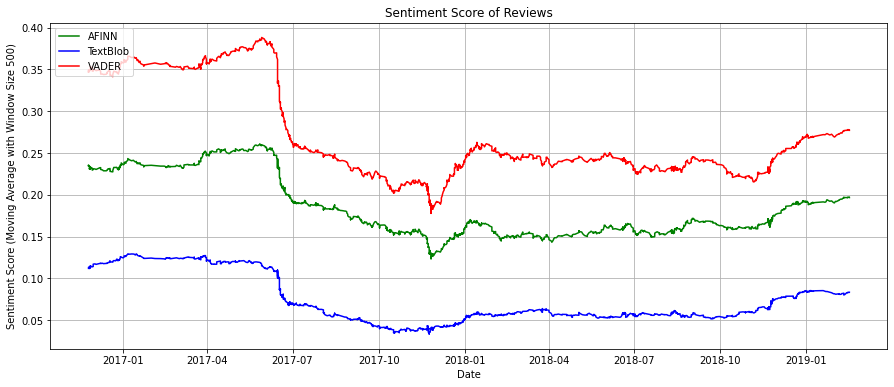

In [13]:
df = ps.sqldf("select *, CASE WHEN AFINN > 10 Then 1.0 WHEN AFINN < -10 THEN -1.0 Else AFINN/10.0 End AS AFINN_scaled from df")

df["date_posted"]=pd.to_datetime(df["date_posted"],format="%m/%d/%Y")
df.sort_values(by=["date_posted"],ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 6))
plt.plot(df.date_posted, df.AFINN_scaled.rolling(window=500).mean(), "-g", label="AFINN")
plt.plot(df.date_posted, df.TextBlob.rolling(window=500).mean(), "-b", label="TextBlob")
plt.plot(df.date_posted, df.VADER.rolling(window=500).mean(), "-r", label="VADER")
plt.legend(loc="upper left")
plt.title("Sentiment Score of Reviews")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 500)")
plt.grid(axis='both')

5. Summary Statistics

In [14]:
#How many Recommended and Not Recommended 
ps.sqldf("select Recommendation, Count(1) AS RecommendationCount from df group by Recommendation")

,recommendation,RecommendationCount
0,Not Recommended,570
1,Recommended,1425


In [15]:
#There are 7 video games that Not Recommended and 40 video games with Recommended
rec = ps.sqldf("select title, SUM(CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End)/Count(1) AS RecommendationRatio from df group by title having count(1) > 10000 order by RecommendationRatio desc, Count(1) desc")
rec = rec.set_index('title')
rec

,RecommendationRatio
title,


<AxesSubplot:ylabel='title'>

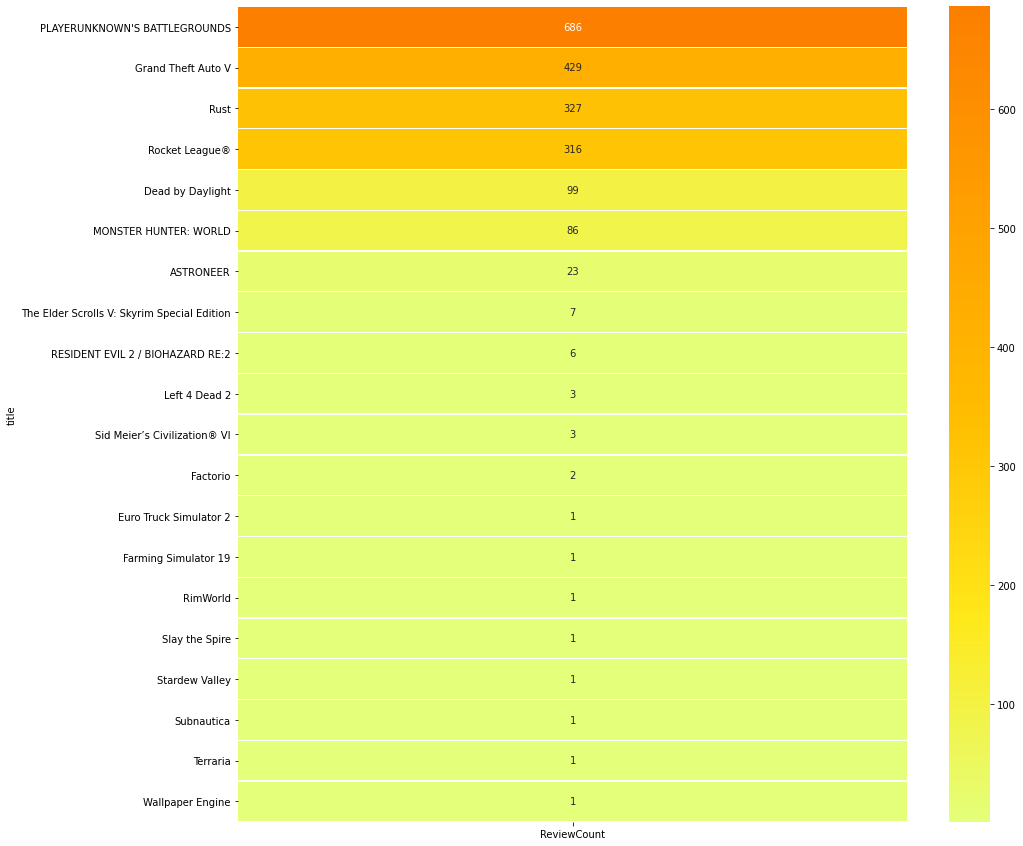

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, Count(1) AS ReviewCount from df group by title order by ReviewCount desc")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(rec, cmap = 'Wistia', linewidths = 0.30, annot = True,fmt='g')


7. Avg hours played + visualization

In [17]:
#Get the descriptive statistics by each of video game
df2=df['hour_played'].groupby([df['title']]).describe()
df2["sum"]=df['hour_played'].groupby([df['title']]).sum() #get sum of hour_played for each of video game
df2=df2.drop(columns = ['std', '25%','50%','75%','min']) #keep only columns that want to keep

#sort to see which video game has the most played hours
df2 = df2.sort_values(by='sum',ascending=False)
df2

,count,mean,max,sum
title,,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,686.0,341.169096,2570.0,234042
Rust,327.0,574.296636,7196.0,187795
Grand Theft Auto V,429.0,303.312354,4532.0,130121
Rocket League®,316.0,383.101266,4289.0,121060
Dead by Daylight,99.0,277.898990,2104.0,27512
MONSTER HUNTER: WORLD,86.0,156.581395,1394.0,13466
Sid Meier’s Civilization® VI,3.0,814.000000,2010.0,2442
ASTRONEER,23.0,51.478261,183.0,1184
Factorio,2.0,590.000000,1071.0,1180


In [18]:
rec = ps.sqldf("select title, SUM(CASE WHEN Recommendation = 'Recommended' Then 1 Else 0 End) AS Recommendation, Count(1) AS TotalReviews from df group by title order by Count(1) desc")
rec = rec.set_index('title')
rec


,Recommendation,TotalReviews
title,,
PLAYERUNKNOWN'S BATTLEGROUNDS,424,686
Grand Theft Auto V,269,429
Rust,251,327
Rocket League®,287,316
Dead by Daylight,76,99
MONSTER HUNTER: WORLD,68,86
ASTRONEER,23,23
The Elder Scrolls V: Skyrim Special Edition,6,7
RESIDENT EVIL 2 / BIOHAZARD RE:2,6,6


<AxesSubplot:xlabel='title', ylabel='Total number of hour-played for each game'>

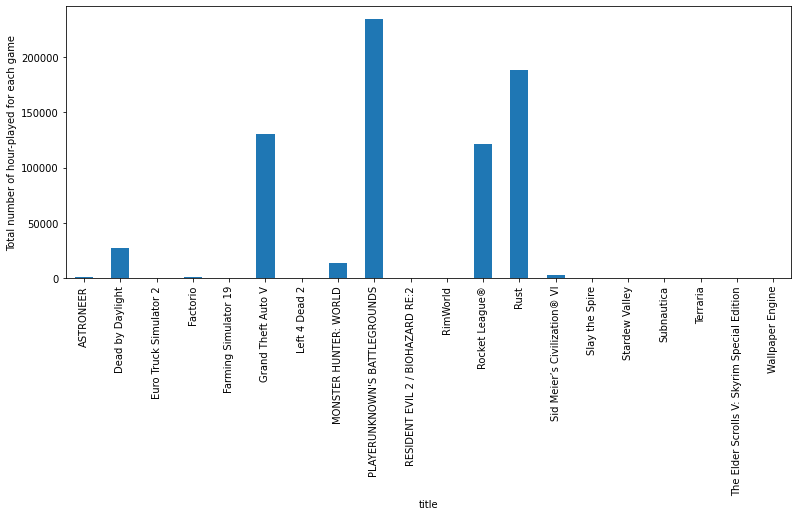

In [19]:
#Visualization on total number of hour-played for each game
import matplotlib
#matplotlib inline
import matplotlib.pyplot as plt
hr_played=df['hour_played'].groupby([df['title']]).sum()
#plt.xticks(rotation=75)
plt.ylabel('Total number of hour-played for each game')
hr_played.plot.bar(figsize=(13,5))

<AxesSubplot:xlabel='title', ylabel='Number review for each game'>

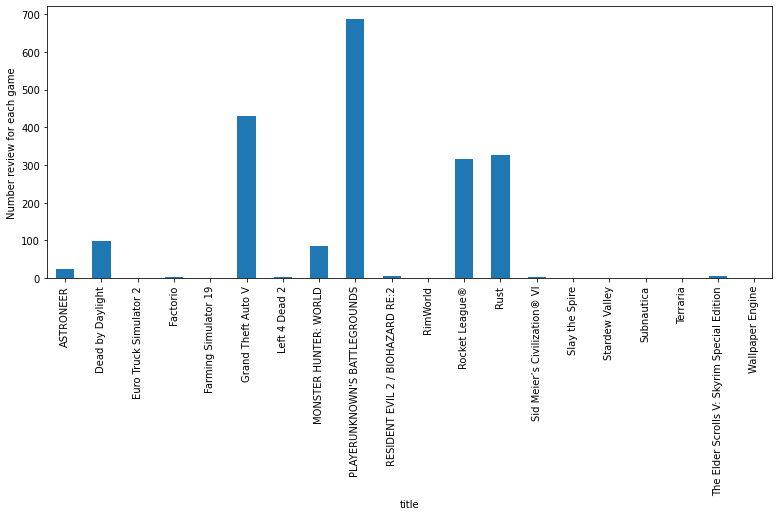

In [20]:
#Visualization on total number of review for each game
#
# Delete this, it tells you nothing
#
import matplotlib
#matplotlib inline
import matplotlib.pyplot as plt
hr_played=df['review'].groupby([df['title']]).count()
#plt.xticks(rotation=75)
plt.ylabel('Number review for each game')
hr_played.plot.bar(figsize=(13,5))

8. Topic Model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation 
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vectorizer = StemmedCountVectorizer(stop_words='english', max_features=2000)
DTM =vectorizer.fit_transform(df['review1'])
lda = LatentDirichletAllocation(n_components=2,
                                n_jobs=-1,   #Use all processors
                                max_iter=2000,   #Reduce it to speed up but compromise on the quality 
                                perp_tol=0.001,  #Increase it to speed up but compromise on the quality 
                                evaluate_every=10, #How often perplexity is calculated.
                                random_state=2021 #Random seed for reproducing the results.
                               )
lda.fit(DTM[0:10])
lda.perplexity(DTM)

3395.8186916933487

Text(0, 0.5, 'Perplexity')

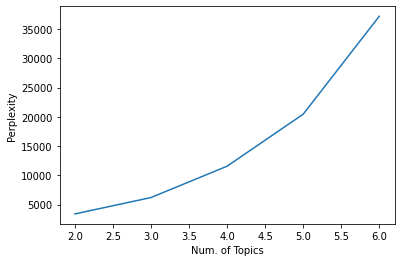

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

num_topics=[2,3,4,5,6]
perplexity=[]
for i in num_topics:
    lda.set_params(n_components=i)
    lda.fit(DTM[0:10])
    perplexity.append(lda.perplexity(DTM))


plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [23]:
from sklearn import preprocessing
import numpy as np
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(5):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
    
#Check your answer
TermOfTopic

,0,1,2,3,4
0,best,game,game,game,best
1,worth,better,player,like,worth
2,time,server,youll,just,time
3,play,rock,food,ing,play
4,rock,play,cloth,great,rock
5,great,awesom,resourc,surviv,great
6,beta,want,surviv,build,beta
7,amaz,overal,best,definet,amaz
8,game,good,play,log,game
9,like,far,rock,fallout,like


In [24]:
TTopicM.sort_values(by=3,ascending=False).iloc[:10,3]

game       0.028884
like       0.012266
just       0.009889
ing        0.007516
great      0.005145
surviv     0.005143
build      0.005142
definet    0.005142
log        0.005142
fallout    0.005142
Name: 3, dtype: float64

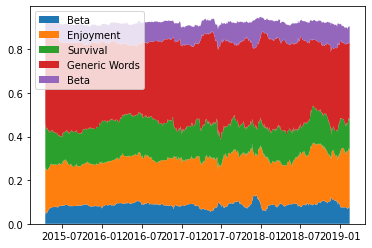

In [25]:
# create new df by concatinating df and DTopicM horizontally
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df, DTopicM], axis=1)

#create timestamp column in dfnew

import matplotlib.pyplot as plt

plt.stackplot(dfnew.date_posted,
              dfnew[0].rolling(window=100).mean(), 
              dfnew[1].rolling(window=100).mean(), 
              dfnew[2].rolling(window=100).mean(), 
              dfnew[3].rolling(window=100).mean(), 
              dfnew[4].rolling(window=100).mean(),
              labels=['Beta','Enjoyment','Survival','Generic Words','Beta'])
plt.legend(loc='upper left')

9. Prediction Model

In [26]:
#Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import nltk 
import numpy as np
from sklearn.svm import l1_min_c
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV  
from xgboost import XGBClassifier

df_train, df_test = train_test_split(df, test_size=0.30, 
                                     random_state=2021   #Random seed set to be 2021.
                                    )
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])



nltk_stopwords = nltk.corpus.stopwords.words("english") 

vectorizer=StemmedTfidfVectorizer(stop_words=nltk_stopwords,
                                  use_idf=True,
                                  smooth_idf=True,
                                  norm=None)

train_x = vectorizer.fit_transform(df_train["review1"])
test_x = vectorizer.transform(df_test["review1"])
train_y = df_train["recommendation"]
test_y = df_test["recommendation"]
train_x.shape

(1396, 6814)

In [27]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=200,    #How many trees in total
                  max_depth=5,         #The depth of each tree
                  objective='binary:logistic',  #loss function for binary classification  
                  nthread=4,           #Multi-thread speed up
                  use_label_encoder=False,  #To avoid an warning message 
                  verbosity = 0,       #Hidden other messages during training
                  random_state=2021)   #Fix the results of random sampling during training
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, nthread=4, num_parallel_tree=None,
              random_state=2021, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None, verbosity=0)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_y=le.fit_transform(train_y)
test_y=le.transform(test_y)
xgb.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [29]:
xgb.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Importance': xgb.feature_importances_
                     })
dfbeta.sort_values(by="Importance",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

,Term,Importance
0,two,0.019010
1,money,0.017209
2,issu,0.015544
3,state,0.015502
4,server,0.015458
5,ing,0.014664
6,pc,0.014366
7,help,0.013489
8,wors,0.013193
9,best,0.013075


In [31]:
xgb.predict_proba(train_x)[0:10]

array([[0.91496193, 0.08503809],
       [0.08685911, 0.9131409 ],
       [0.23521423, 0.76478577],
       [0.10538721, 0.8946128 ],
       [0.23521423, 0.76478577],
       [0.33417207, 0.66582793],
       [0.2196477 , 0.7803523 ],
       [0.07201743, 0.92798257],
       [0.23521423, 0.76478577],
       [0.01088643, 0.98911357]], dtype=float32)

In [32]:
#confusion matrix
print(confusion_matrix(train_y,xgb.predict(train_x)))
print()

[[334  68]
 [  7 987]]



In [33]:
#accurancy score
print(accuracy_score(train_y,xgb.predict(train_x)))
print()

0.9462750716332379



In [34]:
#auc score
print(roc_auc_score(train_y,xgb.predict_proba(train_x)[:, 1]))
print()

0.9835255312972361

